In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.formula.api as sm
warnings.filterwarnings('ignore')

In [3]:
dfs = pd.read_excel("Capraro.xls", sheet_name=None)
data = dfs['Capraro Barcelo JBEP 2020data']
data = data[2:]
data = data.drop_duplicates(subset='IPAddress').drop_duplicates(subset='TurkID')
sns.set_color_codes('deep')

In [4]:
dfs['codebook']

,sex,"1=male, 2=female, 3=other"
0,race,"1=american indian or alaska native, 2=asian, 3..."
1,political_views,"1=very left leaning, 7=very right leaning"
2,urban,"1=urban/subusrban, 2=rural, 3=dont know"
3,face covering obligs,1 = live in county where face mask is mandator...
4,shelter-in-place,1 = live in county where shelter-in-place rule...
5,tested_positive,"1 = yes, i tested positive"
6,tested_negative,"1 = yes, i tested negative"
7,likelihood to get covid,"1 = stronglyu disagree, 7 strongly agree"
8,get_over,same


In [5]:
for col in data.columns:
    print(col)

StartDate
EndDate
IPAddress
TurkID
face_covering_1
face_covering_2
face_covering_3
social_distancing_1
social_distancing_2
social_distancing_3
social_distancing_4
face_covering_judgme_1
face_covering_judgme_2
face_covering_judgme_3
face_covering_judgme_4
face_covering_judgme_5
sex
sex_3_TEXT
age
race
political_views
religion
urban
face_covering_obligs
shelter-in-place
tested_positive
tested_negative
likelihood_get_covid
get_over
randomization_dependent_variables
randomization_treatment


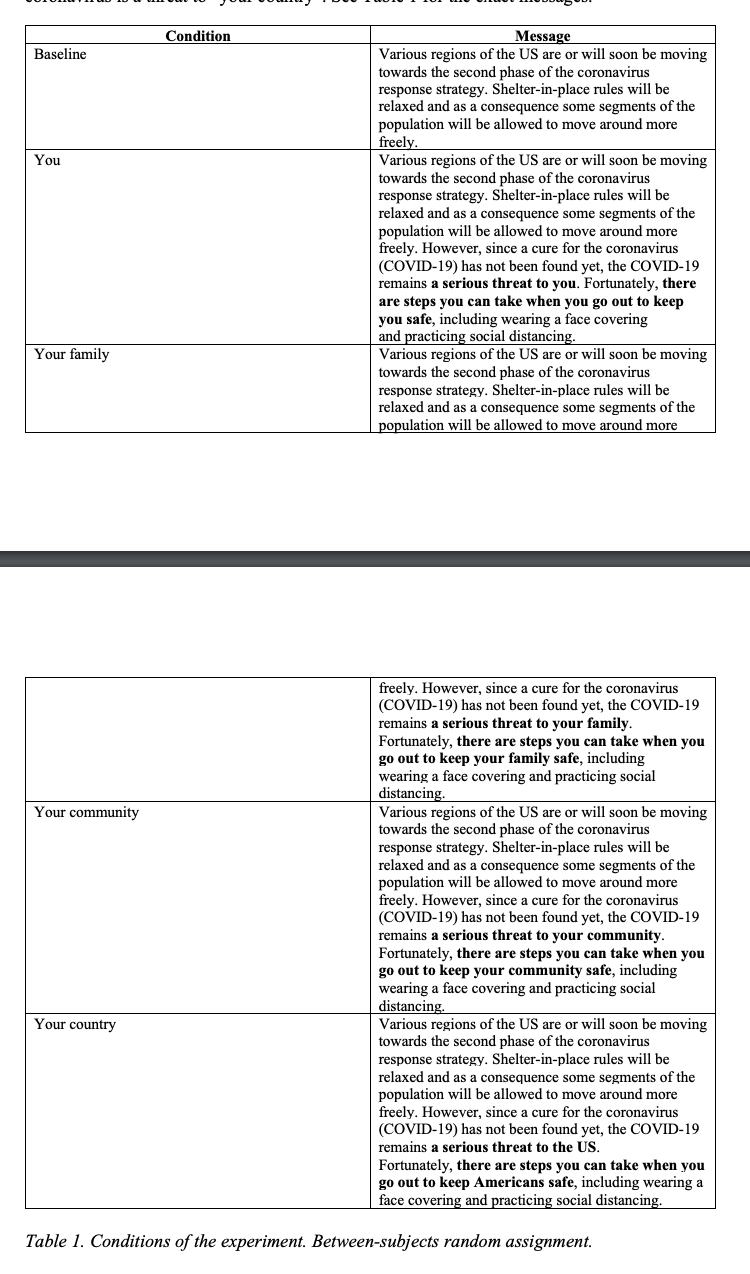

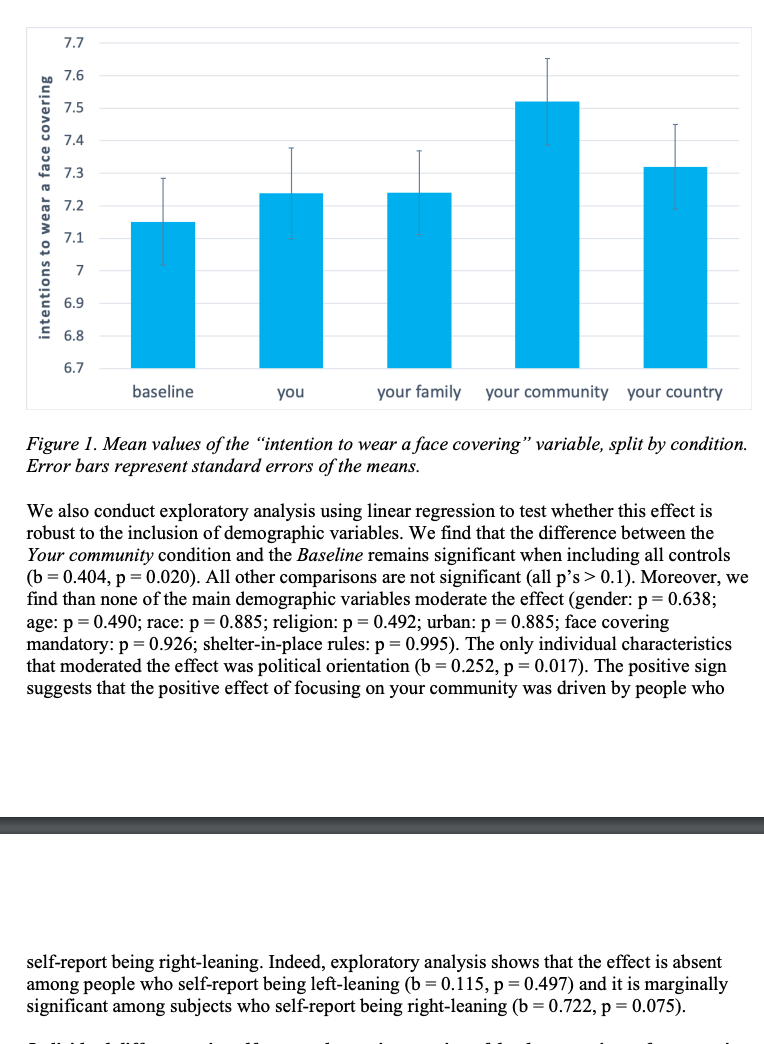

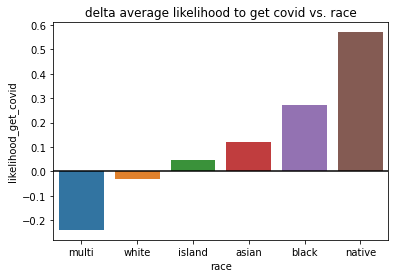

In [6]:
base_val = np.mean(data[['likelihood_get_covid']].dropna())

races = ['blank', 'native', 'asian', 'black', 'island', 'white', 'multi']
race_cov = {}
for i in range(1, 7):
    race_cov[races[i]] = np.mean(data[data['race'] == i][['likelihood_get_covid']].dropna()) - base_val

race_cov = pd.DataFrame.from_dict(race_cov, orient='index').sort_values(by=['likelihood_get_covid']).reset_index()
race_cov['race'] = race_cov['index']
sns.barplot(x='race', y='likelihood_get_covid', data=race_cov).axhline(0, color='black')
plt.title("delta average likelihood to get covid vs. race");

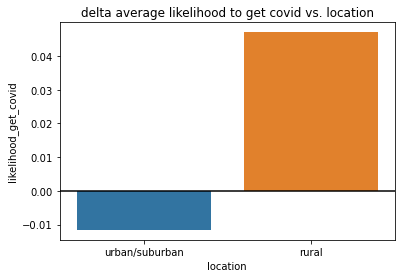

In [7]:
urban_pol_df = data.groupby('urban').agg(np.mean)[['likelihood_get_covid']].reset_index()
urban_pol_df['likelihood_get_covid'] -= np.mean(data['likelihood_get_covid'].dropna())
urban_pol_df['location'] = ['urban/suburban', 'rural', '']
sns.barplot(x='location', y='likelihood_get_covid', data=urban_pol_df[:2]).axhline(0, color='black')
plt.title("delta average likelihood to get covid vs. location");

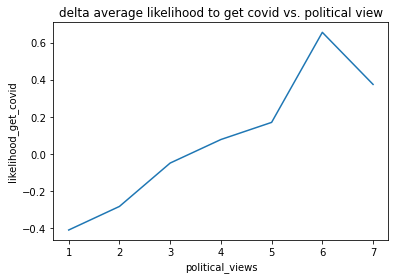

In [8]:
pol_cov = data.groupby('political_views').agg(np.mean)['likelihood_get_covid'].reset_index()
pol_cov['likelihood_get_covid'] -= float(base_val)
sns.lineplot(data=pol_cov, x = 'political_views', y='likelihood_get_covid');
plt.title("delta average likelihood to get covid vs. political view");

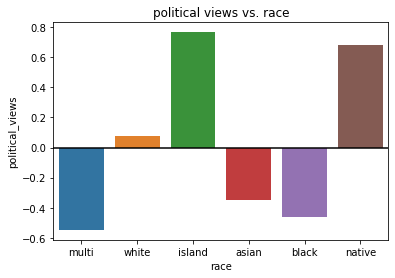

In [9]:
race_pol_mean_df = data.groupby('race').agg(np.mean)[['political_views']].reset_index()
race_pol_mean_df['race'] = ['native', 'asian', 'black', 'island', 'white', 'multi']

base_race_pol = float(np.mean(data[['political_views']].dropna()))

race_pol_mean_df['political_views'] -= base_race_pol
race_pol_mean_df['order'] = [6, 4, 5, 3, 2, 1]
race_pol_mean_df = race_pol_mean_df.sort_values('order')
sns.barplot(x='race', y='political_views', data=race_pol_mean_df).axhline(0, color='black')
plt.title("political views vs. race");

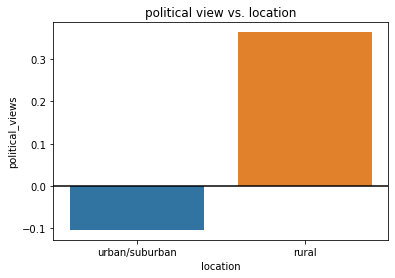

In [10]:
urban_pol_df = data.groupby('urban').agg(np.mean)[['political_views']].reset_index()
urban_pol_df['political_views'] -= np.mean(data['political_views'].dropna())
urban_pol_df['location'] = ['urban/suburban', 'rural', '']
sns.barplot(x='location', y='political_views', data=urban_pol_df[:2]).axhline(0, color='black')
plt.title("political view vs. location");

In [11]:
data[['face_covering_1', 'face_covering_2', 'face_covering_3',
      'social_distancing_1','social_distancing_2','social_distancing_3','social_distancing_4',
    'randomization_dependent_variables', 'randomization_treatment', 'age']].head()

,face_covering_1,face_covering_2,face_covering_3,social_distancing_1,social_distancing_2,social_distancing_3,social_distancing_4,randomization_dependent_variables,randomization_treatment,age
2,7.0,8.0,3.0,2.0,3.0,8.0,7.0,facecovering|socialdistancing,you,36.0
3,10.0,10.0,0.0,5.0,5.0,10.0,10.0,facecovering|socialdistancing,community,27.0
4,8.0,10.0,7.0,8.0,9.0,8.0,8.0,socialdistancing|facecovering,country,26.0
5,10.0,10.0,10.0,10.0,10.0,10.0,10.0,facecovering|socialdistancing,baseline,35.0
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,facecovering|socialdistancing,you,35.0


In [12]:
data['agg mask'] = data[['face_covering_1', 'face_covering_2', 'face_covering_3']].mean(axis=1)

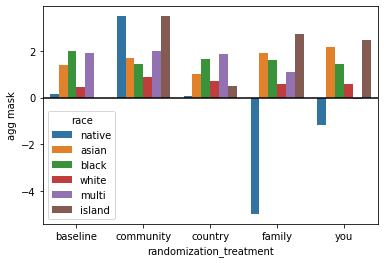

In [13]:
races_dict = {1:'native', 2:'asian', 3:'black', 4:'island', 5:'white', 6:'multi'}
mask_rand_df = data.groupby(['randomization_treatment', 'race']).agg(np.mean)[['agg mask']].reset_index().replace(races_dict)
mask_rand_df['agg mask'] -= 6.5
sns.barplot(x='randomization_treatment', y='agg mask', hue='race', data=mask_rand_df).axhline(0, color='black');

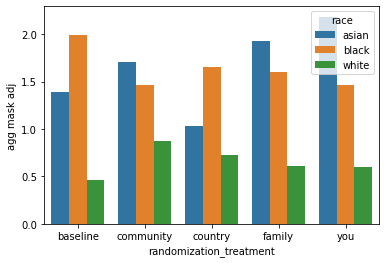

In [14]:
races_dict = {1:'native', 2:'asian', 3:'black', 4:'island', 5:'white', 6:'multi'}
mask_rand_df = data.groupby(['randomization_treatment', 'race']).agg(np.mean)[['agg mask']].reset_index().replace(races_dict)
mask_rand_df['agg mask adj'] = mask_rand_df['agg mask'] - 6.5

#at least 20 data points
mask_rand_df = mask_rand_df[data.groupby(['randomization_treatment', 'race']).count().reset_index()['StartDate'] >= 20]

sns.barplot(x='randomization_treatment', y='agg mask adj', hue='race', data=mask_rand_df);

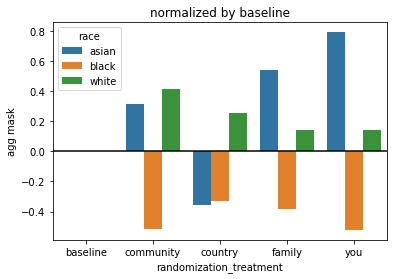

In [15]:
asian_mask_diff = mask_rand_df[mask_rand_df['randomization_treatment'] == 'baseline'].iloc[0]['agg mask']
black_mask_diff = mask_rand_df[mask_rand_df['randomization_treatment'] == 'baseline'].iloc[1]['agg mask']
white_mask_diff = mask_rand_df[mask_rand_df['randomization_treatment'] == 'baseline'].iloc[2]['agg mask']

asian_mask_sub = mask_rand_df[mask_rand_df['race'] == 'asian']
asian_mask_sub['agg mask'] -= asian_mask_diff

black_mask_sub = mask_rand_df[mask_rand_df['race'] == 'black']
black_mask_sub['agg mask'] -= black_mask_diff

white_mask_sub = mask_rand_df[mask_rand_df['race'] == 'white']
white_mask_sub['agg mask'] -= white_mask_diff

plt.title('normalized by baseline')
sns.barplot(x='randomization_treatment', y='agg mask', hue='race', data=pd.concat([asian_mask_sub, black_mask_sub, white_mask_sub])).axhline(0, color='black');

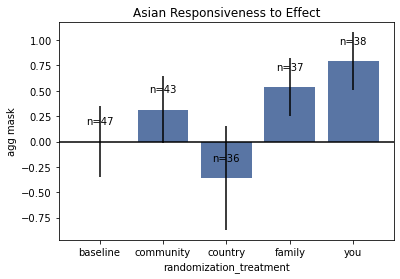

In [16]:
asian_ss = []
asian_ci = []
for i in ['baseline', 'community', 'country', 'family', 'you']:
    curr = data[(data['race'] == 2) & (data['randomization_treatment'] == i)]['agg mask']
    asian_ss.append(len(curr)) 
    asian_ci.append(np.std(curr) / np.sqrt(len(curr)))
#print(asian_ci)
    
graph = sns.barplot(x='randomization_treatment', y='agg mask', data=asian_mask_sub, color='b', ci=asian_ci)
plt.errorbar(asian_mask_sub['randomization_treatment'], asian_mask_sub['agg mask'], asian_ci, fmt='none', ecolor='black')

index = 0
for p in graph.patches:
    graph.annotate('n='+str(asian_ss[index]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')
    index += 1
graph.axhline(0, color='black')
plt.title('Asian Responsiveness to Effect');

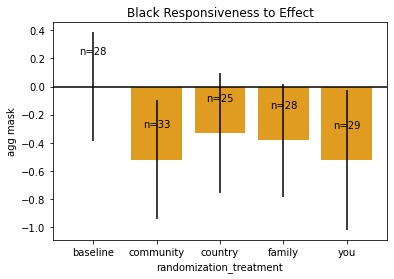

In [17]:
black_ss = []
black_ci = []
for i in ['baseline', 'community', 'country', 'family', 'you']:
    curr = data[(data['race'] == 3) & (data['randomization_treatment'] == i)]['agg mask']
    black_ss.append(len(curr)) 
    black_ci.append(np.std(curr) / np.sqrt(len(curr)))
#print(black_ci)
    
graph = sns.barplot(x='randomization_treatment', y='agg mask', data=black_mask_sub, color='orange', ci=black_ci)
plt.errorbar(black_mask_sub['randomization_treatment'], black_mask_sub['agg mask'], black_ci, fmt='none', ecolor='black')

index = 0
for p in graph.patches:
    graph.annotate('n='+str(black_ss[index]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 35), 
                   textcoords = 'offset points')
    index += 1
graph.axhline(0, color='black')
plt.title('Black Responsiveness to Effect');

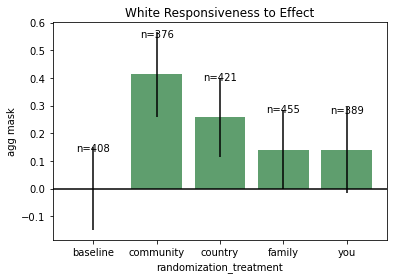

In [18]:
white_ss = []
white_ci = []
for i in ['baseline', 'community', 'country', 'family', 'you']:
    curr = data[(data['race'] == 5) & (data['randomization_treatment'] == i)]['agg mask']
    white_ss.append(len(curr)) 
    white_ci.append(np.std(curr) / np.sqrt(len(curr)))
#print(white_ci)
    
graph = sns.barplot(x='randomization_treatment', y='agg mask', data=white_mask_sub, color='g', ci=white_ci)
plt.errorbar(white_mask_sub['randomization_treatment'], white_mask_sub['agg mask'], white_ci, fmt='none', ecolor='black')

index = 0
for p in graph.patches:
    graph.annotate('n='+str(white_ss[index]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 40), 
                   textcoords = 'offset points')
    index += 1
graph.axhline(0, color='black')
plt.title('White Responsiveness to Effect');

In [60]:
race_mask_tbl = data[['randomization_treatment', 'race', 'agg mask']].dropna()
race_mask_dummies = pd.get_dummies(race_mask_tbl.randomization_treatment, prefix="r")
race_mask_dummies['race'] = race_mask_tbl['race']
race_mask_dummies['agg_mask'] = race_mask_tbl['agg mask']
for i in [2, 3, 5]:
    print('\n\n', races_dict[i], 'OLS')
    race_mask_dummies_sub = race_mask_dummies.loc[race_mask_dummies['race'] == i]
    race_mask_reg = sm.ols(formula="agg_mask ~ r_community + r_country + r_family + r_you", data=race_mask_dummies_sub).fit()
    print(race_mask_reg.summary())



 asian OLS
                            OLS Regression Results                            
Dep. Variable:               agg_mask   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.433
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.224
Time:                        09:35:43   Log-Likelihood:                -450.87
No. Observations:                 201   AIC:                             911.7
Df Residuals:                     196   BIC:                             928.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.8936      0.337    

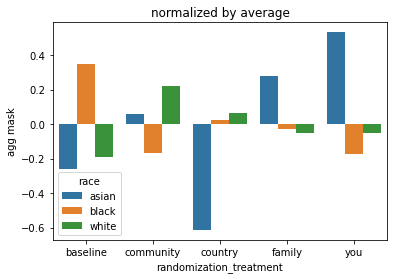

In [19]:
avg_asian_mask_diff = np.mean(mask_rand_df[mask_rand_df['race'] == 'asian']['agg mask'])
avg_black_mask_diff = np.mean(mask_rand_df[mask_rand_df['race'] == 'black']['agg mask'])
avg_white_mask_diff = np.mean(mask_rand_df[mask_rand_df['race'] == 'white']['agg mask'])

asian_mask_sub = mask_rand_df[mask_rand_df['race'] == 'asian']
asian_mask_sub['agg mask'] -= avg_asian_mask_diff

black_mask_sub = mask_rand_df[mask_rand_df['race'] == 'black']
black_mask_sub['agg mask'] -= avg_black_mask_diff

white_mask_sub = mask_rand_df[mask_rand_df['race'] == 'white']
white_mask_sub['agg mask'] -= avg_white_mask_diff

plt.title('normalized by average')
sns.barplot(x='randomization_treatment', y='agg mask', hue='race', data=pd.concat([asian_mask_sub, black_mask_sub, white_mask_sub]));

In [ ]:
df = customername, customerid, purchasedate, amount, taxamount
#customer name who spent the most last month

last_month = df[df['purchasedate']]
total_purchase_last_month = last_month.groupby('customerid').agg(sum)
total_purchase_last_month[total_purchase_last_month['amount'] == max(total_purchase_last_month['amount'])]['customername']

